# 4.10. Final report (tasks 5-9)
#

# List of contents:
## 1. Import libraries
## 2. Import 'subset_customers_norm_activity' dataset
## 3. Merge df_active_customers and df_departments
## 4. Create customer profiles:
### 4.1. Profiles based on age
### 4.2. Profiles based on income
### 4.3. Profiles based on family status and number of dependants
### 4.4. Profile based on department
## 5. Create crosstabs and visualizations
## 6. Additional visualization
## 7. Export final dataframe
#

## 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

## 2. Import 'subset_customers_norm_activity' dataset

In [2]:
# Create path variable
path = r'C:\Users\marta\OneDrive\Documents\2023-09-18 Instacart Basket Analysis'

In [3]:
# Import dataset
df_active_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'subset_customers_norm_activity.pkl'))

In [4]:
# Function to display all columns
pd.set_option('display.max_columns', None)

In [5]:
# Check output
df_active_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_order_day,order_freq_flag,gender,state,age,date_joined,n_dependants,fam_status,income,regions,user_activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity


In [6]:
# Check dimensions
df_active_customers.shape

(30959687, 32)

## 3. Merge df_active_customers and df_departments


In [7]:
# Import 'departments_wrangled' dataset
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [8]:
# Check output
df_departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [9]:
# Change 'Unnamed:0' column name to 'department_id'
df_departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [10]:
# Check the output
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
# Merge df_active_customers and df_departments on a key column 'department_id'
active_customers_departs = df_active_customers.merge(df_departments, on = 'department_id')

In [12]:
# Check the output
active_customers_departs.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_order_day,order_freq_flag,gender,state,age,date_joined,n_dependants,fam_status,income,regions,user_activity_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages


In [13]:
# Check dimensions
active_customers_departs.shape

(30959687, 33)

In [14]:
# Export merged dataframe as 'active_customers_departments_merged.pkl'
active_customers_departs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers_departments_merged.pkl' ))

## 4. Create customer profiles:

### -- Import 'active_customers_departments_merged.pkl' dataset

In [15]:
# Import 'active_customers_departments_merged.pkl' 
active_customers_departs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers_departments_merged.pkl'))

In [16]:
# Check the output
active_customers_departs.head(3)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_order_day,order_freq_flag,gender,state,age,date_joined,n_dependants,fam_status,income,regions,user_activity_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages


In [17]:
# Check dimensions
active_customers_departs.shape

(30959687, 33)

### 4.1. Profiles based on age

In [18]:
# Descriptive statistics for 'age' column 
active_customers_departs['age'].describe()

count    3.095969e+07
mean     4.946803e+01
std      1.848527e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

##### Min age is 18 years, max age - 81 years, average age - 49 years. Based on this, I decided to create next age groups:<br> 
- 18-29 years old,
- 30-49 years old,
- 50-64 years old,
- 65-81 years old.

In [19]:
# Create a flag for 18-29 years old
active_customers_departs.loc[(active_customers_departs['age'] >=18) & (active_customers_departs['age'] <30), 'age_group'] = '18-29 years old'

In [20]:
# Create a flag for 30-49 years old
active_customers_departs.loc[(active_customers_departs['age'] >=30) & (active_customers_departs['age'] <50), 'age_group'] = '30-49 years old'

In [21]:
# Create a flag for 50-64 years old
active_customers_departs.loc[(active_customers_departs['age'] >=50) & (active_customers_departs['age'] <65), 'age_group'] = '50-64 years old'

In [22]:
# Create a flag for 65-81 years old
active_customers_departs.loc[(active_customers_departs['age'] >=65) & (active_customers_departs['age'] <=81), 'age_group'] = '65-81 years old'

In [23]:
# Check the output
active_customers_departs['age_group'].value_counts().sort_index()

age_group
18-29 years old    5816632
30-49 years old    9729166
50-64 years old    7219622
65-81 years old    8194267
Name: count, dtype: int64

### -- Distribution chart for 'age_group'

(array([0, 1, 2, 3]),
 [Text(0, 0, '18-29 years old'),
  Text(1, 0, '30-49 years old'),
  Text(2, 0, '50-64 years old'),
  Text(3, 0, '65-81 years old')])

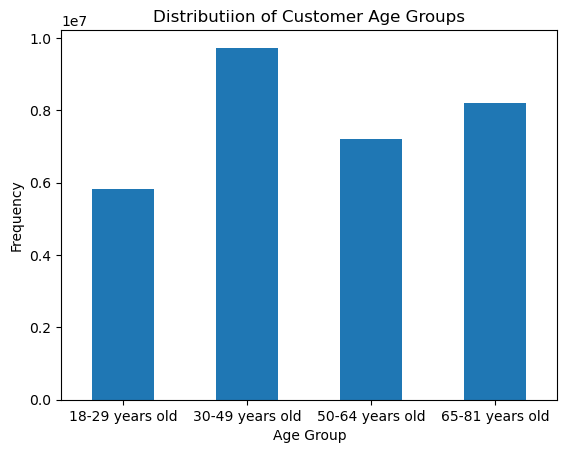

In [24]:
# Create distribution chart for 'age_groups'
bar_age_group_distr = active_customers_departs['age_group'].value_counts().sort_index().plot.bar()

plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Distributiion of Customer Age Groups')

plt.xticks(rotation = 360)

In [25]:
# Export bar chart
bar_age_group_distr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_distrib.png'),bbox_inches='tight')

### -- Aggregation of 'prices' and 'order_number' for age groups

In [26]:
# Aggregate 'order_number' and 'prices' for age groups
active_customers_departs.groupby('age_group').agg({'order_number': ['mean','max','min'], 'prices': ['mean','max','min']})

order_number            prices           
                        mean max min      mean   max  min
age_group                                                
18-29 years old    17.803479  99   1  7.782198  25.0  1.0
30-49 years old    17.891946  99   1  7.793116  25.0  1.0
50-64 years old    17.837796  99   1  7.786995  25.0  1.0
65-81 years old    17.785164  99   1  7.796715  25.0  1.0

### 4.2. Profiles based on income

In [27]:
# Descriptive statistics for 'age' column 
active_customers_departs['income'].describe()

count    3.095969e+07
mean     9.965502e+04
std      4.309143e+04
min      2.590300e+04
25%      6.728600e+04
50%      9.676100e+04
75%      1.280810e+05
max      5.939010e+05
Name: income, dtype: float64

###### Mean = 99,655, min = 25,903, max = 593,901. Income can be divided into the following categories:<br>
- low = <65,000,
- medium = 65,001-145,000, 
- high = 145,001+

In [28]:
# Create low income flag
active_customers_departs.loc[active_customers_departs['income'] <= 65000, 'income_group'] = 'Low income'

In [29]:
# Create medium income flag
active_customers_departs.loc[(active_customers_departs['income'] > 65000) & (active_customers_departs['income'] <= 145000), 'income_group'] = 'Medium income'

In [30]:
# Create low income flag
active_customers_departs.loc[active_customers_departs['income'] > 145000, 'income_group'] = 'High income'

In [31]:
# Check the output
active_customers_departs['income_group'].value_counts()

income_group
Medium income    19075278
Low income        7107833
High income       4776576
Name: count, dtype: int64

### -- Distribution chart for 'income_group'

(array([0, 1, 2]),
 [Text(0, 0, 'Medium income'),
  Text(1, 0, 'Low income'),
  Text(2, 0, 'High income')])

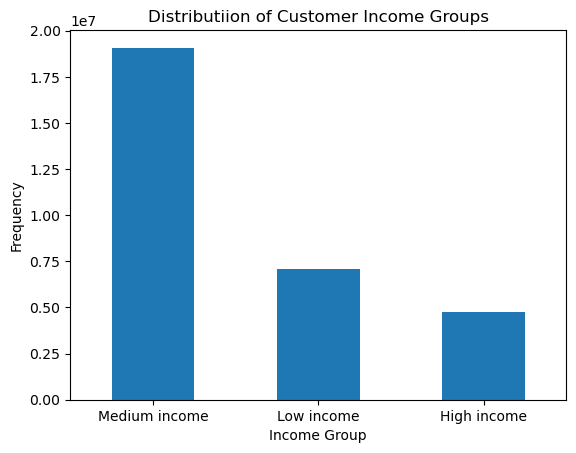

In [32]:
# Create distribution chart for 'income_group'
bar_income_group_distr = active_customers_departs['income_group'].value_counts().plot.bar()

plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.title('Distributiion of Customer Income Groups')

plt.xticks(rotation = 360)

In [33]:
# Export bar chart
bar_income_group_distr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group_distrib.png'),bbox_inches='tight')

### -- Aggregate prices and orders number for income groups

In [34]:
# Aggregate 'order_number' and 'prices' for income groups
active_customers_departs.groupby('income_group').agg({'order_number': ['mean','max','min'], 'prices': ['mean','max','min']})

order_number            prices           
                      mean max min      mean   max  min
income_group                                           
High income      18.004112  99   1  7.943191  25.0  1.0
Low income       17.432673  99   1  7.242977  25.0  1.0
Medium income    17.941651  99   1  7.956430  25.0  1.0

### 4.4. Profiles based on family status and number of dependants

In [35]:
# Frequency table for 'fam_status' column 
active_customers_departs['fam_status'].value_counts()

fam_status
married                             21740200
single                               5093677
divorced/widowed                     2644831
living with parents and siblings     1480979
Name: count, dtype: int64

In [36]:
# Frequency table for 'n_dependants' column 
active_customers_departs['n_dependants'].value_counts().sort_index()

n_dependants
0    7738508
1    7717946
2    7731924
3    7771309
Name: count, dtype: int64

In [37]:
# Create a crosstab between 'fam_status' and 'n_dependants'
cross_family_dependant = pd.crosstab(active_customers_departs['fam_status'], active_customers_departs['n_dependants'], dropna = False)

In [38]:
# Check the output
cross_family_dependant

n_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2644831,0,0,0
living with parents and siblings,0,507980,484596,488403
married,0,7209966,7247328,7282906
single,5093677,0,0,0


##### Based on family status and number of dependants, next groups can be created:<br>
- single without dependants (divorced/widowed and single with 0 dependants)
- single with dependants (living with parents and siblings with 1/2/3 dependants)
- married with dependants (married with 1/2/3 dependants)

In [39]:
# Create 'single without dependants' flag
active_customers_departs.loc[active_customers_departs['fam_status'].isin(['divorced/widowed','single']), 'marital_dependant_group'] = 'Single without dependants'

In [40]:
# Create 'single with dependants' flag
active_customers_departs.loc[active_customers_departs['fam_status'] == 'living with parents and siblings', 'marital_dependant_group'] = 'Single with dependants'

In [41]:
# Create 'married with dependants' flag
active_customers_departs.loc[active_customers_departs['fam_status'] == 'married', 'marital_dependant_group'] = 'Married with dependants'

In [42]:
# Check the output
active_customers_departs['marital_dependant_group'].value_counts()

marital_dependant_group
Married with dependants      21740200
Single without dependants     7738508
Single with dependants        1480979
Name: count, dtype: int64

### -- Distribution chart for 'marital_dependant_group'

(array([       0.,  5000000., 10000000., 15000000., 20000000., 25000000.]),
 [Text(0.0, 0, '0.0'),
  Text(5000000.0, 0, '0.5'),
  Text(10000000.0, 0, '1.0'),
  Text(15000000.0, 0, '1.5'),
  Text(20000000.0, 0, '2.0'),
  Text(25000000.0, 0, '2.5')])

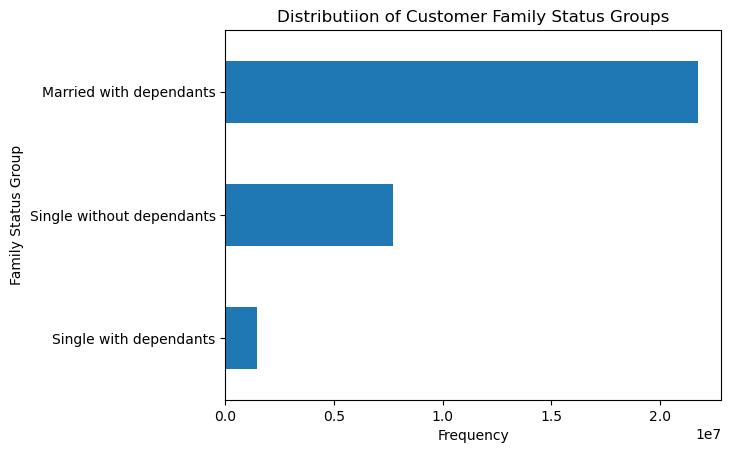

In [43]:
# Create distribution chart for 'martial_dependant_group'
bar_marital_dep_group_distr = active_customers_departs['marital_dependant_group'].value_counts().sort_values().plot.barh()

plt.ylabel('Family Status Group')
plt.xlabel('Frequency')
plt.title('Distributiion of Customer Family Status Groups')

plt.xticks(rotation = 360)

In [44]:
# Export bar chart
bar_marital_dep_group_distr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_marital_dep_group_distrib.png'),bbox_inches='tight')

### -- Aggregate prices and orders number for marital and dependant groups

In [45]:
# Aggregate 'order_number' and 'prices' for marital_dependant_group
active_customers_departs.groupby('marital_dependant_group').agg({'order_number': ['mean','max','min'], 'prices': ['mean','max','min']})

order_number            prices           
                                  mean max min      mean   max  min
marital_dependant_group                                            
Married with dependants      17.779028  99   1  7.790278  25.0  1.0
Single with dependants       18.000750  99   1  7.800604  25.0  1.0
Single without dependants    17.958265  99   1  7.789550  25.0  1.0

## 4.4. Profile based on department

In [46]:
# Frequency of products purchased by department
active_customers_departs['department'].value_counts()

department
produce            9079273
dairy eggs         5172305
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

### -- Distribution chart for 'department'

Text(0.5, 1.0, 'Total Number of Products Purchased per Department')

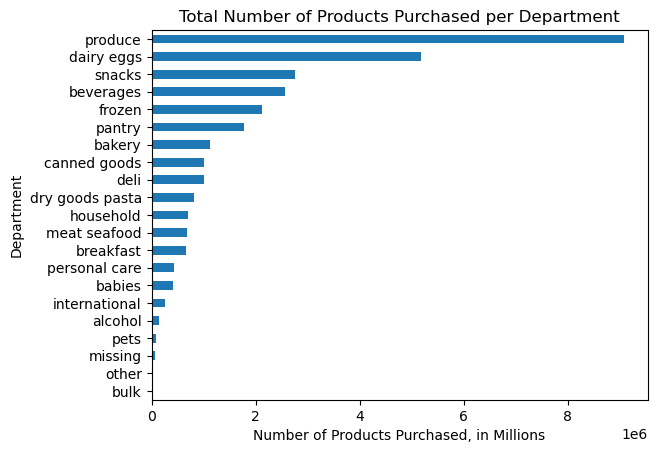

In [47]:
# Create bar chart to show amount of products purchased per department
bar_department_ords = active_customers_departs['department'].value_counts().sort_values().plot.barh()

plt.ylabel('Department')
plt.xlabel('Number of Products Purchased, in Millions')
plt.title('Total Number of Products Purchased per Department')

In [48]:
# Export bar chart
bar_department_ords.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_orders.png'),bbox_inches='tight')

In [49]:
# Check income per department
active_customers_departs.groupby('department').prices.sum().sort_values(ascending = False)

department
produce            72455761.7
dairy eggs         43118260.7
beverages          19758773.9
frozen             16408884.0
pantry             14287456.5
snacks             11827920.3
meat seafood       10998953.4
bakery              8806886.2
deli                7813188.1
canned goods        7637778.5
dry goods pasta     6042181.4
breakfast           5388030.2
household           5164910.3
personal care       3393915.0
babies              3133096.4
international       1965702.9
alcohol             1178811.1
pets                 734009.7
missing              560933.3
bulk                 279212.8
other                239569.2
Name: prices, dtype: float64

Text(0.5, 1.0, 'Total Income by Department')

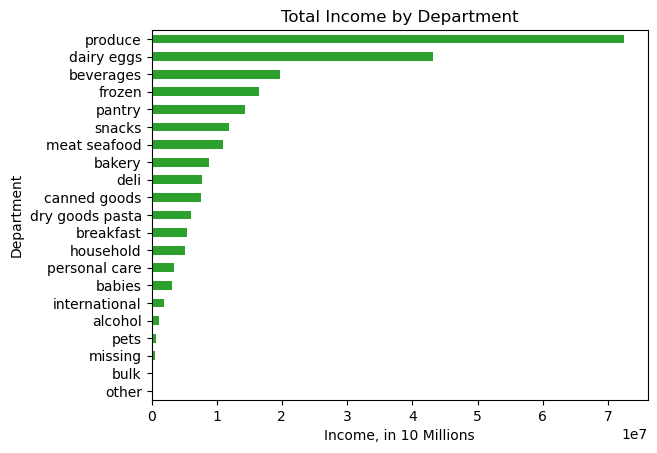

In [50]:
# Create bar chart to show income per department
bar_depart_income = active_customers_departs.groupby('department').prices.sum().sort_values(ascending = True).plot(kind = 'barh', color = 'tab:green')

plt.ylabel('Department')
plt.xlabel('Income, in 10 Millions')
plt.title('Total Income by Department')


In [51]:
# Export bar chart
bar_depart_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_income.png'),bbox_inches='tight')

Text(0.5, 1.0, 'Average Prices by Department')

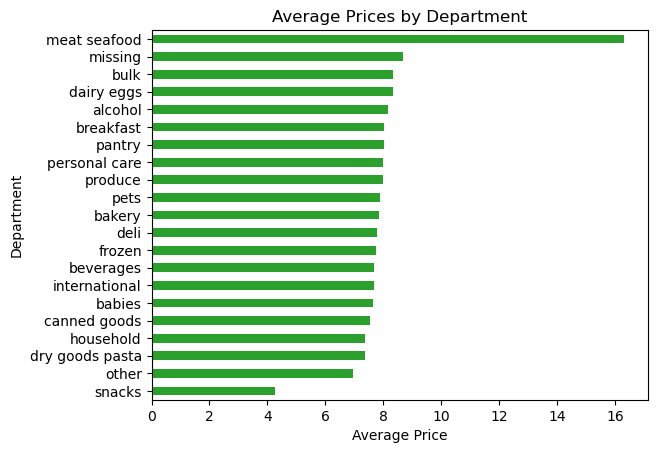

In [52]:
# Create bar chart to show avg prices per department
bar_depart_avg_price = active_customers_departs.groupby('department').prices.mean().sort_values(ascending = True).plot(kind = 'barh', color = 'tab:green')

plt.ylabel('Department')
plt.xlabel('Average Price')
plt.title('Average Prices by Department')


In [53]:
# Export bar chart
bar_depart_avg_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_avg_prices.png'),bbox_inches='tight')

### -- Aggregate prices and orders number for department

In [54]:
# Aggregate 'order_number' and 'prices' for departments
active_customers_departs.groupby('department').agg({'order_number': ['mean','max','min'], 'prices': ['mean','max','min']})

order_number             prices           
                        mean max min       mean   max  min
department                                                
alcohol            16.034226  99   1   8.150699  15.0  1.0
babies             19.867090  99   1   7.634399  15.0  1.0
bakery             17.856619  99   1   7.857482  15.0  1.0
beverages          17.901479  99   1   7.682556  15.0  1.0
breakfast          17.469987  99   1   8.031647  14.9  1.0
bulk               20.797555  99   1   8.346919  14.1  1.4
canned goods       16.933858  99   1   7.546660  15.0  1.0
dairy eggs         18.326914  99   1   8.336372  15.0  1.0
deli               17.144802  99   1   7.783347  15.0  1.0
dry goods pasta    16.633019  99   1   7.349370  15.0  1.0
frozen             16.160739  99   1   7.733725  15.0  1.0
household          16.438914  99   1   7.379951  15.0  1.0
international      17.174694  99   1   7.678797  15.0  1.0
meat seafood       16.576910  99   1  16.300034  25.0  8.0
missing            24.281327  99   1   8.660655  15.0  1.0
other              18.096481  99   1   6.961995  15.0  1.1
pantry             17.328319  99   1   8.014482  20.0  1.0
personal care      16.933392  99   1   7.998744  15.0  1.0
pets               15.995927  99   1   7.887489  15.0  1.0
produce            18.495730  99   1   7.980348  15.0  1.0
snacks             17.830354  99   1   4.275555   7.0  1.6

## 5. Create crosstabs and visualizations

### -- 'age_group' and 'department'

In [55]:
# Create a crosstab between 'age_group' and 'department'
cross_age_department = pd.crosstab(active_customers_departs['department'], active_customers_departs['age_group'].sort_values(), dropna = False)

In [56]:
# Check the output
cross_age_department

age_group,18-29 years old,30-49 years old,50-64 years old,65-81 years old
department,,,,
alcohol,27938,46155,33841,36693
babies,77758,130770,95660,106204
bakery,210358,352255,262218,295997
beverages,477655,803187,607039,684020
breakfast,128115,210133,157306,175296
bulk,6414,10594,7498,8945
canned goods,192170,316357,236038,267509
dairy eggs,975307,1635441,1194762,1366795
deli,188533,315711,234391,265199


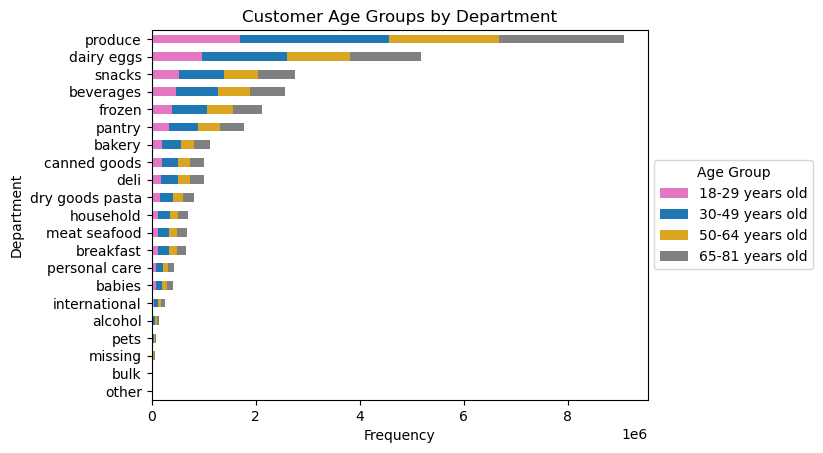

In [57]:
# Create stacked bar chart for age_group by department

bar_age_group_dep = cross_age_department.sort_values(by='30-49 years old', ascending=True).plot(kind='barh', stacked=True, color = ['tab:pink', 'tab:blue', 'goldenrod', 'grey'])
plt.xlabel('Frequency')
plt.ylabel('Department')
plt.title('Customer Age Groups by Department')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Age Group')

In [58]:
# Export bar chart
bar_age_group_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_departments.png'),bbox_inches='tight')

### -- 'income_group' and 'department'

In [59]:
# Create a crosstab between 'income_group' and 'department'
cross_income_department = pd.crosstab(active_customers_departs['department'], active_customers_departs['income_group'].sort_values(), dropna = False)

In [60]:
# Check the output
cross_income_department

income_group,High income,Low income,Medium income
department,,,
alcohol,27851,34383,82393
babies,66033,73943,270416
bakery,181165,241396,698267
beverages,382734,693630,1495537
breakfast,101746,174107,394997
bulk,4582,8787,20082
canned goods,163485,200464,648125
dairy eggs,806099,1122381,3243825
deli,154627,227449,621758


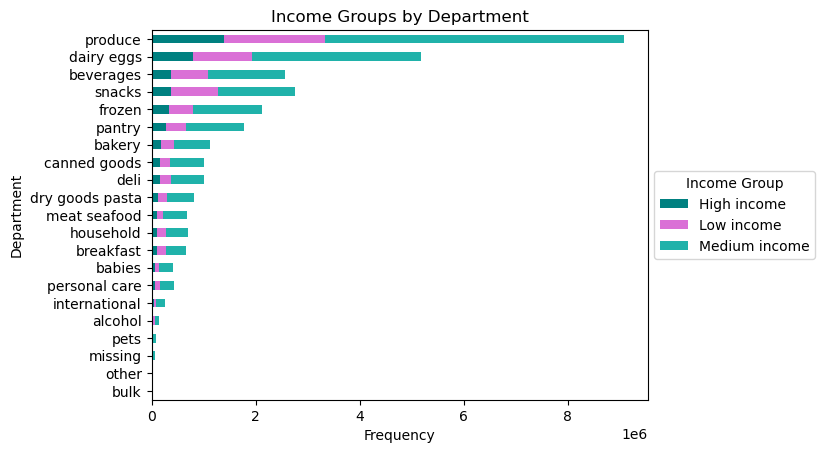

In [61]:
# Create stacked bar chart for income_group by department
bar_income_group_dep = cross_income_department.sort_values(by='Medium income', ascending=True).plot(kind='barh', stacked=True, color = ['teal', 'orchid', 'lightseagreen'])
plt.xlabel('Frequency')
plt.ylabel('Department')
plt.title('Income Groups by Department')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Income Group')

In [62]:
# Export bar chart
bar_income_group_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group_departments.png'),bbox_inches='tight')

### -- 'marital_dependant_group' and 'department'

In [63]:
# Create a crosstab between 'marital_dependant_group' and 'department'
cross_marital_department = pd.crosstab(active_customers_departs['department'], active_customers_departs['marital_dependant_group'].sort_values(), dropna = False)

In [64]:
# Check the output
cross_marital_department

marital_dependant_group,Married with dependants,Single with dependants,Single without dependants
department,,,
alcohol,99421,8379,36827
babies,287683,19381,103328
bakery,785749,53684,281395
beverages,1807453,119107,645341
breakfast,471220,33198,166432
bulk,23818,1633,8000
canned goods,712577,48477,251020
dairy eggs,3629088,250014,1293203
deli,702333,48119,253382


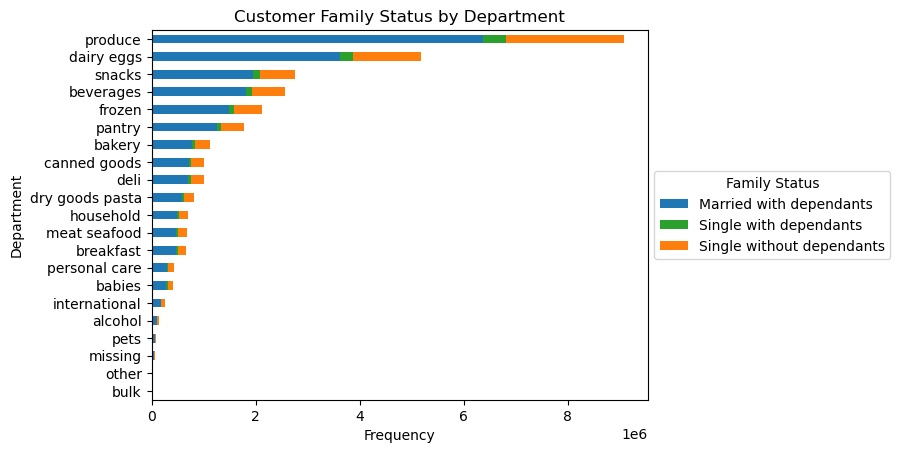

In [65]:
# Create stacked bar chart for marital_dependant_group by department
bar_marital_group_dep = cross_marital_department.sort_values(by='Married with dependants', ascending=True).plot(kind='barh', stacked=True, color = ['tab:blue', 'tab:green', 'tab:orange'])
plt.xlabel('Frequency')
plt.ylabel('Department')
plt.title('Customer Family Status by Department')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Family Status')

In [66]:
# Export bar chart
bar_marital_group_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_marital_group_departments.png'),bbox_inches='tight')

### -- 'age_group' and 'regions'

In [67]:
# Create a crosstab between 'age_group' and 'regions'
cross_age_region = pd.crosstab(active_customers_departs['regions'], active_customers_departs['age_group'].sort_values(), dropna = False)

In [68]:
# Check the output
cross_age_region

age_group,18-29 years old,30-49 years old,50-64 years old,65-81 years old
regions,,,,
Midwest,1355548,2301632,1699398,1903728
Northeast,1023858,1707090,1248324,1484610
South,2522240,4202086,3133982,3520827
West,914986,1518358,1137918,1285102


(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'Northeast'),
  Text(3, 0, 'West')])

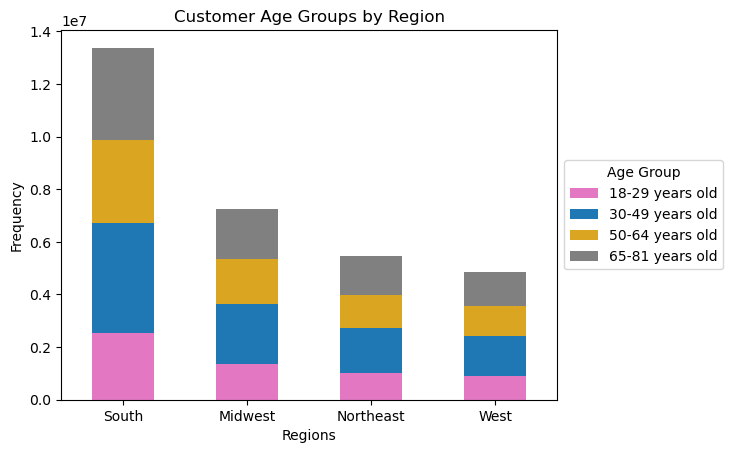

In [69]:
# Create stacked bar chart for age_group by region
bar_age_group_reg = cross_age_region.sort_values(by='30-49 years old', ascending=False).plot(kind='bar', stacked=True, color = ['tab:pink', 'tab:blue', 'goldenrod', 'grey'])

plt.ylabel('Frequency')
plt.xlabel('Regions')
plt.title('Customer Age Groups by Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Age Group')

plt.xticks(rotation = 360)

In [70]:
# Export bar chart
bar_age_group_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_regions.png'),bbox_inches='tight')

### -- 'income_group' and 'regions'

In [71]:
# Create a crosstab between 'income_group' and 'regions'
cross_income_reg = pd.crosstab(active_customers_departs['regions'], active_customers_departs['income_group'].sort_values(), dropna = False)

In [72]:
# Check the output
cross_income_reg

income_group,High income,Low income,Medium income
regions,,,
Midwest,1126066,1639363,4494877
Northeast,841989,1247015,3374878
South,2059637,3109626,8209872
West,748884,1111829,2995651


(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'Northeast'),
  Text(3, 0, 'West')])

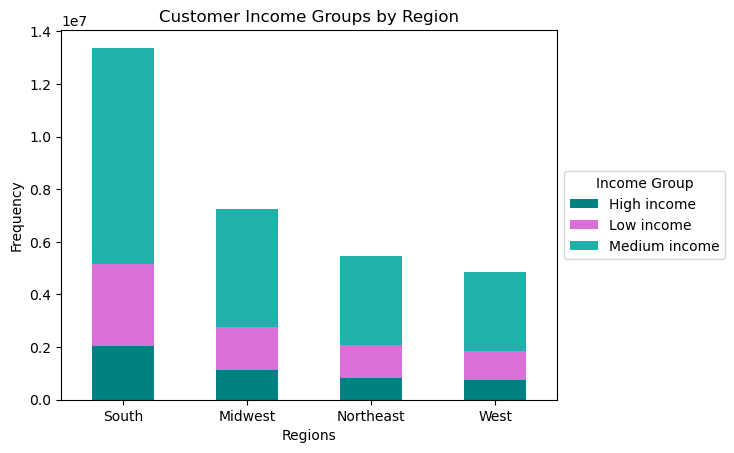

In [73]:
# Create stacked bar chart for regions by income_group
bar_income_group_reg = cross_income_reg.sort_values(by='Medium income', ascending=False).plot(kind='bar', stacked=True, color = ['teal', 'orchid', 'lightseagreen'])

plt.ylabel('Frequency')
plt.xlabel('Regions')
plt.title('Customer Income Groups by Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Income Group')

plt.xticks(rotation = 360)

In [74]:
# Export bar chart
bar_income_group_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group_regions.png'),bbox_inches='tight')

### -- 'marital_dependant_group' and 'region'

In [75]:
# Create a crosstab between 'marital_dependant_group' and 'region'
cross_marital_reg = pd.crosstab(active_customers_departs['regions'], active_customers_departs['marital_dependant_group'].sort_values(), dropna = False)

In [76]:
# Check the output
cross_marital_reg

marital_dependant_group,Married with dependants,Single with dependants,Single without dependants
regions,,,
Midwest,5086374,351401,1822531
Northeast,3853188,256417,1354277
South,9386282,655426,3337427
West,3414356,217735,1224273


(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'Northeast'),
  Text(3, 0, 'West')])

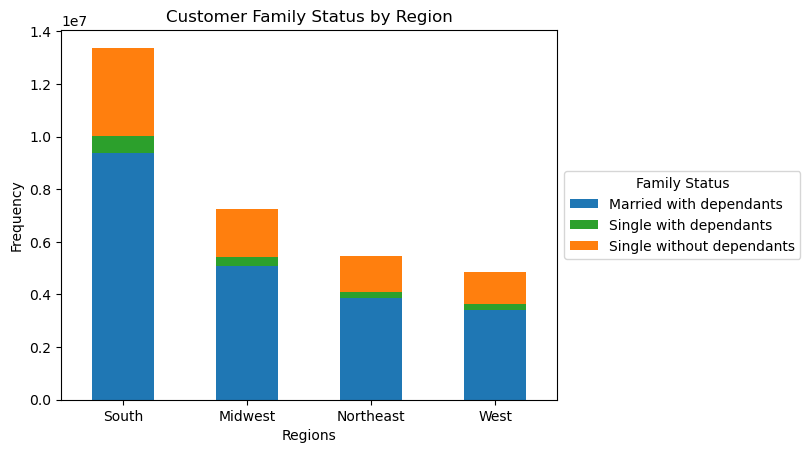

In [77]:
# Create stacked bar chart for regions by marital_dependant_group
bar_marital_group_reg = cross_marital_reg.sort_values(by='Married with dependants', ascending=False).plot(kind='bar', stacked=True, color = ['tab:blue', 'tab:green', 'tab:orange'])

plt.ylabel('Frequency')
plt.xlabel('Regions')
plt.title('Customer Family Status by Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Family Status')

plt.xticks(rotation = 360)

In [78]:
# Export bar chart
bar_marital_group_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_marital_group_regions.png'),bbox_inches='tight')

### -- 'department' and 'regions'

In [79]:
# Create a crosstab between 'department' and 'regions'
cross_depart_reg = pd.crosstab(active_customers_departs['department'], active_customers_departs['regions'].sort_values(), dropna = False)

In [80]:
# Check the output
cross_depart_reg

regions,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,62363,23204
babies,95741,72712,180341,61598
bakery,261753,199300,483615,176160
beverages,598979,462929,1108602,401391
breakfast,156155,117904,289596,107195
bulk,7929,5599,14618,5305
canned goods,237459,176936,436718,160961
dairy eggs,1211283,913813,2235506,811703
deli,234464,178398,433688,157284


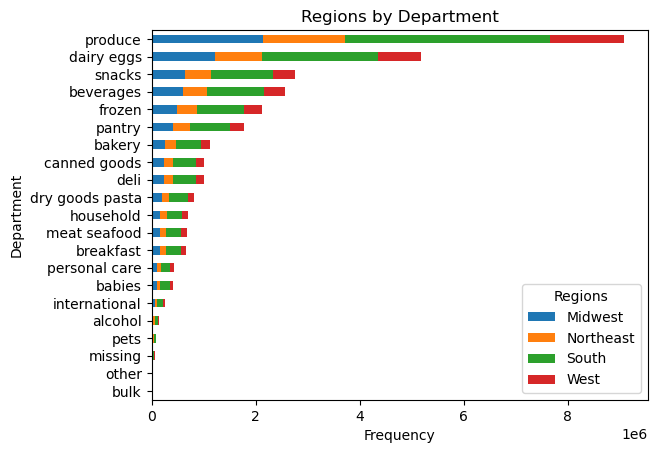

In [81]:
# Create stacked bar chart for region by department

bar_depart_reg = cross_depart_reg.sort_values(by='South', ascending=True).plot(kind='barh', stacked=True)
plt.xlabel('Frequency')
plt.ylabel('Department')
plt.title('Regions by Department')
plt.legend(title = 'Regions')

In [82]:
# Export bar chart
bar_depart_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_regions.png'),bbox_inches='tight')

### -- Crosstabs between age group and family status

In [83]:
# Create a crosstab between 'age_group' and 'marital_dependant_group'
cross_age_marital = pd.crosstab(active_customers_departs['age_group'], active_customers_departs['marital_dependant_group'].sort_values(), dropna = False)

In [84]:
# Check the output
cross_age_marital

marital_dependant_group,Married with dependants,Single with dependants,Single without dependants
age_group,,,
18-29 years old,2888251,1480979,1447402
30-49 years old,7302834,0,2426332
50-64 years old,5376452,0,1843170
65-81 years old,6172663,0,2021604


(array([0, 1, 2, 3]),
 [Text(0, 0, '18-29 years old'),
  Text(1, 0, '30-49 years old'),
  Text(2, 0, '50-64 years old'),
  Text(3, 0, '65-81 years old')])

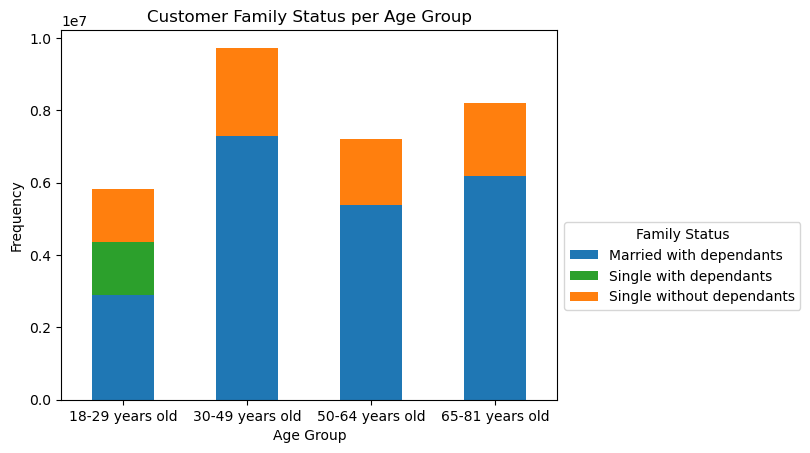

In [85]:
# Create stacked bar chart for age_group by region
bar_age_marital = cross_age_marital.plot(kind='bar', stacked=True, color = ['tab:blue', 'tab:green', 'tab:orange'])
plt.ylabel('Frequency')
plt.xlabel('Age Group')
plt.title('Customer Family Status per Age Group')
plt.legend(bbox_to_anchor=(1.0, 0.5), title = 'Family Status')

plt.xticks(rotation = 360)

In [86]:
# Export bar chart
bar_age_marital.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_marital.png'),bbox_inches='tight')

## 6. Additional visualization

### -- Income by region

Text(0.5, 1.0, 'Total Income by Region')

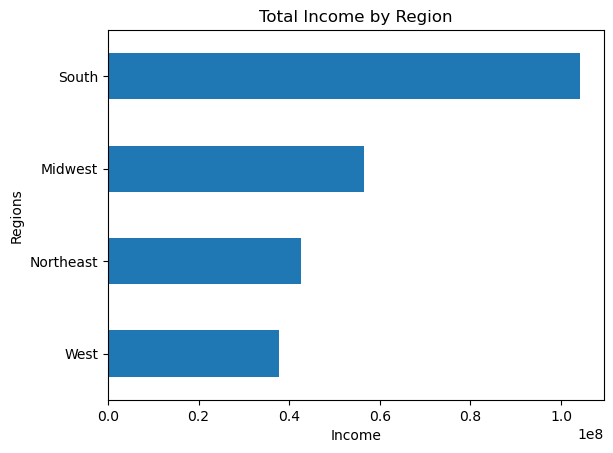

In [87]:
# Create bar chart to show income per region
bar_region_income = active_customers_departs.groupby('regions').prices.sum().sort_values(ascending = True).plot(kind = 'barh')

plt.ylabel('Regions')
plt.xlabel('Income')
plt.title('Total Income by Region')


In [88]:
# Export bar chart
bar_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_regions.png'),bbox_inches='tight')

## 7. Export final dataframe

In [89]:
# Export active_customers_departs dataframe as 'active_customers_departments_merged_final.pkl'
active_customers_departs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers_departments_merged_final.pkl'))